In [3]:
library(tidyverse)
options(jupyter.plot_mimetypes="image/png")
options(repr.plot.width=4, repr.plot.height=3)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.0     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()


# Lecture 01: Getting to know ``ggplot``

<div style="border: 1px double black; padding: 10px; margin: 10px">

**Goals for today's lecture:**

After today's lecture you will understand how to:

* Use the ``ggplot2`` package to produce simple plots.
* Use the `filter` command to do basic data filtering.
* Understand the basics of [aesthetic mappings](#Aesthetic-Mappings).

</div>

Data visualization is an important skill to master as a data scientist. There are several tools available for data visualization. There are paid services/products offered by companies like [Tableau](https://www.tableau.com/) that let people generate high quality visualizations from data stored in speadsheets and databases. [D3.js](https://d3js.org/) is a Javascript library that uses a browser to display high quality, interactive graphics. Spreadsheet programs, such as Microsoft Excel, also offer visualization tools.

Since this is a course based on the R language, we will explore the visualization tools provided by the R language and packages. Even if we restrict ourselves to R, we have a few choices. The [R base graphics package](https://stat.ethz.ch/R-manual/R-devel/library/graphics/html/00Index.html) provides basic plotting tools that may be sufficient for many purposes. We will look at the [ggplot2 package](http://ggplot2.org/) that offers a higher level of abstraction to create graphics. For an interesting comparison between base R graphics and ggplots, see this [blog post](https://flowingdata.com/2016/03/22/comparing-ggplot2-and-r-base-graphics/).

In this lecture we'll look at a data set on gas mileage called `mpg`:

In [4]:
print(mpg)

# A tibble: 234 x 11
   manufacturer model    displ  year   cyl trans   drv     cty   hwy fl    class
   <chr>        <chr>    <dbl> <int> <int> <chr>   <chr> <int> <int> <chr> <chr>
 1 audi         a4         1.8  1999     4 auto(l… f        18    29 p     comp…
 2 audi         a4         1.8  1999     4 manual… f        21    29 p     comp…
 3 audi         a4         2    2008     4 manual… f        20    31 p     comp…
 4 audi         a4         2    2008     4 auto(a… f        21    30 p     comp…
 5 audi         a4         2.8  1999     6 auto(l… f        16    26 p     comp…
 6 audi         a4         2.8  1999     6 manual… f        18    26 p     comp…
 7 audi         a4         3.1  2008     6 auto(a… f        18    27 p     comp…
 8 audi         a4 quat…   1.8  1999     4 manual… 4        18    26 p     comp…
 9 audi         a4 quat…   1.8  1999     4 auto(l… 4        16    25 p     comp…
10 audi         a4 quat…   2    2008     4 manual… 4        20    28 p     comp…
# … wit

A fundamental type of plot is a [scatter plot](https://en.wikipedia.org/wiki/Scatter_plot). It can be used to examine the relationship between 2 variables. Cartesian coordinates are used with one variable plotted along the x-axis and the other plotted along the y-axis. Let us create a scatter plot of the engine displacement **displ** (in liters) versus the highway mileage **hwy** (in mpg).

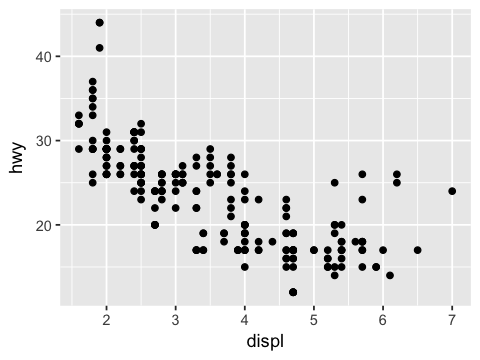

To produce this plot I used `ggplot()`. Specifically, I ran the following command:

```r
ggplot(mpg) + geom_point(mapping = aes(x = displ, y = hwy))
```

Try running this for yourself and see what happens.

Let's unpack the command shown above
- The first part, `ggplot(mpg)`, tells R that we are going to make a plot using the `mpg` data table.
- The second part, `geom_point()`, says we are going to make a point (a.k.a. scatter) plot.
- The argument `mapping = aes(x = displ, y = hwy)` tells R what variables (columns in `mpg`) we want to plot on each axis.

The general formula for making a ggplot is:
```r
ggplot(data = <DATA>) + <GEOM>(mapping = aes(<AESTHETICS>))
```
This is nice because it makes it easy to alter the plots.

## Exercise
- Instead of plotting highway gas mileage vs. displacement, make a scatter plot of city gase mileage vs. displacement.
- Instead of making a scatter plot, make a plot in which all the data points are connected by a line. (This will look very ugly.)

In [10]:
## Solutions (your code here)

From the scatter plot, we see that bigger engines (larger displacment) get worse gas mileage. Let's check this by adding a regression line to the plot.

Recall from STATS 250 that a regression line is the line that we would get by fitting the linear model 

$$\text{hwy} = \hat{a} + \hat{b} \times \text{displ}$$ 

to this data set.

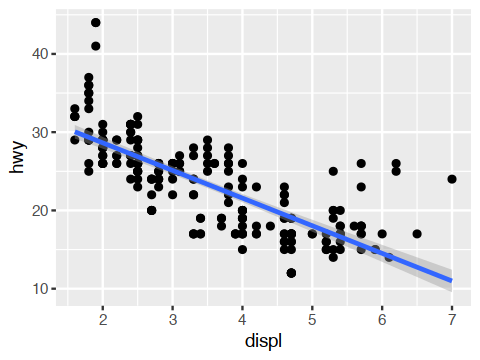

In [12]:
ggplot(mpg, mapping = aes(x = displ, y = hwy)) + 
    geom_point() + geom_smooth(method="lm")

Here I have introduced a couple of new concepts:
-  I added a second element of the plot called `geom_smooth()`. This generated the regression line.
-  I moved the `mapping=aes(x=displ, y=hwy)` to `ggplot()`. This makes it apply to both of the `geom()`s. If we did not do this we would get an error, because `geom_smooth()` would not know what variables to use.

Sure enough, there's a declining relationship up to about 5L engine displacement. Notice that the regression line is not necessarily a good model for this data -- there are some outliers in the 5-7L engine displacement categories. Consider what happens if we fit a non-linear smoothing line to these data:

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


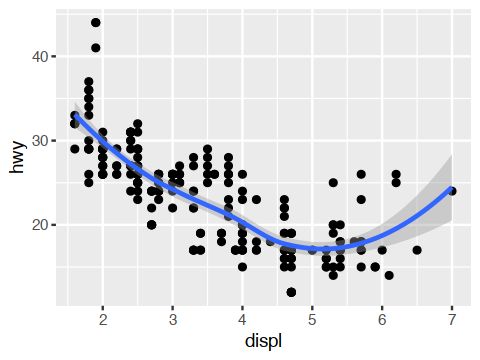

In [15]:
ggplot(mpg, mapping = aes(x = displ, y = hwy)) + 
    geom_point() + geom_smooth()

Let's investigate these outlying points in more detail. To do this we need to learn our first data manipulation command: `filter()`. This command takes a data frame as its first argument and one or more filtering conditions as its second argument.

## Exercise
Complete the command below to keep only the observations that have a highway mileage of 23-26mpg and a displacement of 5-7L:
```
filter(mpg, hwy >= 23, ...)
```
You should get a table that looks like:
```
# A tibble: 6 x 11
  manufacturer model      displ  year   cyl trans drv     cty   hwy fl    class
  <chr>        <chr>      <dbl> <int> <int> <chr> <chr> <int> <int> <chr> <chr>
1 chevrolet    corvette     5.7  1999     8 manu… r        16    26 p     2sea…
2 chevrolet    corvette     5.7  1999     8 auto… r        15    23 p     2sea…
3 chevrolet    corvette     6.2  2008     8 manu… r        16    26 p     2sea…
4 chevrolet    corvette     6.2  2008     8 auto… r        15    25 p     2sea…
5 chevrolet    corvette     7    2008     8 manu… r        15    24 p     2sea…
6 pontiac      grand prix   5.3  2008     8 auto… f        16    25 p     mids…
```

The Corvette and Grand Prix are muscle cars. They get better gas mileage than would be expected for their engine size because they are lightweight.

In [16]:
## Solution (your code here)

## Exercise
It would be helpful to somehow visualize the class of the auto alongside the data on mileage and displacement. By modifying the aesthetic of the scatter plot, see if you can guess how to generate this plot:
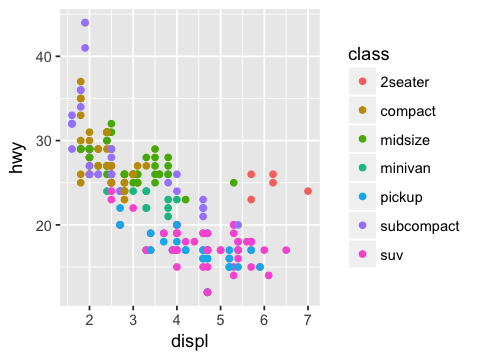

In [17]:
## Solution (your code here)

Note what ggplot did for us. It chose a unique value of **color** for a unique value of **class** and also displayed a legend explaining the choices.

# Aesthetic Mappings
What you have just seen are examples of how to manipulate **aes**thetic mappings. Let us pay close attention to the syntax here. It has the form:

```r
ggplot(data = <DATA>, aes=(<MAPPINGS>)) +
    <GEOM>(data = <OTHER DATA>, 
    mapping = aes(<OTHER MAPPINGS>))
```

An important point is that the ``data=`` and ``mapping=`` parameters given to ``ggplot()`` will be the defaults
for all the other geoms, *unless* you override them by specifying individual values at each level.

## Exercise
Reproduce the plot, which maps the **class** variable to the **shape** aesthetic:
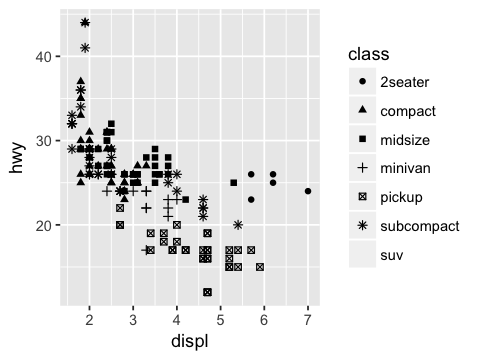

In [18]:
## Solution (your code here)

We get a warning since, by default, only 6 shapes are used at a time but the **class** variable takes 7 values. In our case, points with SUV class went unplotted.

It makes more sense to map a continuous variable like **cty** (city mileage) to a continuous aesthetic **size**.

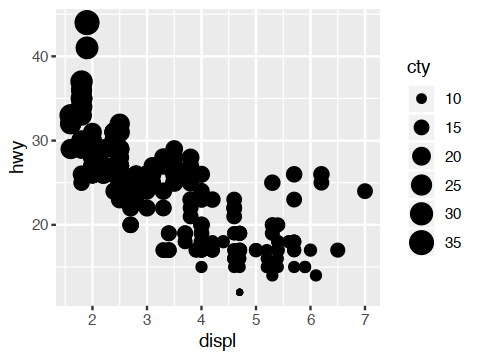

In [19]:
ggplot(data = mpg) +  # sized by city gas mileage
    geom_point(mapping = aes(x = displ, y = hwy, 
                             size = cty))

Here we see an example of a phenomenon called *overplotting*: too much information is displayed, and the result is that less information is conveyed. There are several ways we can address this. For example, we can use the `alpha=` parameter to add some transparency.

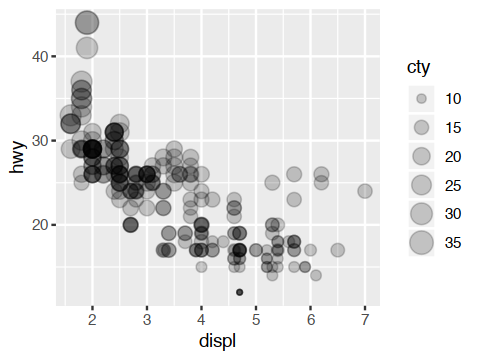

In [20]:
ggplot(data = mpg) +  # sized by city gas mileage
    geom_point(mapping = aes(x = displ, y = hwy, size = cty), alpha=.2)

Alternatively we can use a *jitter plot*, which jitters (adds a small amount of random noise) to each point.

## Exercise
Use `geom_jitter` to re-create this plot:
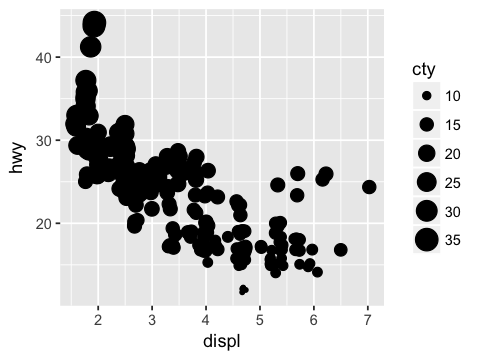

In [34]:
## Solution (your code here)

**color** is an interesting aesthetic. It works even when we map a continuous variable to it but it works differently for continuous and categorical variables.

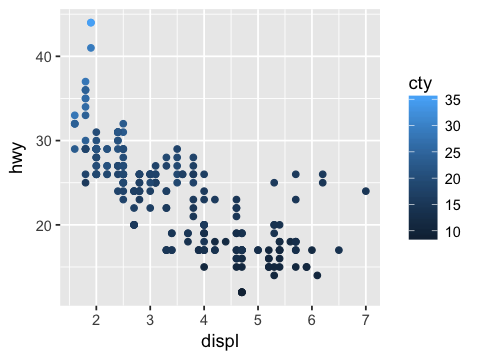

In [35]:
ggplot(data = mpg) +
    geom_point(mapping = aes(x = displ, y = hwy, color = cty))

An aesthetic need not be mapped directly to a variable. For example, we can map the color aesthetic to TRUE/FALSE depending on whether the **year** variable has a value less than 2000 or not.

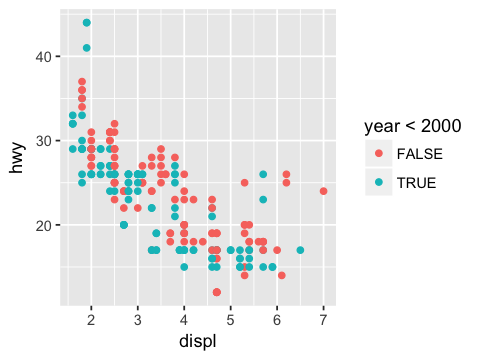

In [36]:
ggplot(data = mpg) +  # older cars get worse mileage
    geom_point(mapping = aes(x = displ, y = hwy, color = year < 2000))

Inspired by this plot, perhaps we want to plot **year** against mileage.

## Exercise
Make a plot of year vs. highway gas mileage. Paste your plot into Slack.

In [23]:
## Solution (your code here)

It turns out that there are only two years represented in the data, not really enought to paint a full picture over time. Instead we can treat year as a categorical variable and look at the distribution of **hwy** within each value of year. For this we will use a new geom called ``boxplot``:

Warning message:
“Continuous x aesthetic -- did you forget aes(group=...)?”

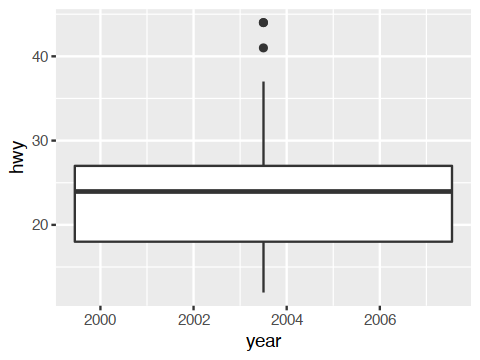

In [26]:
ggplot(data = mpg) +  # year vs. hwy. 
    geom_boxplot(mapping = aes(x=year, y=hwy))

This doesn't quite do what we want. Just like the warning message says, the problem is that the **year** variable is continuous. However since we have only a few different values of year in our data set, we need to tell R that we want to temporarily think of it as discrete. The way to do this is by converting **year** to a factor:

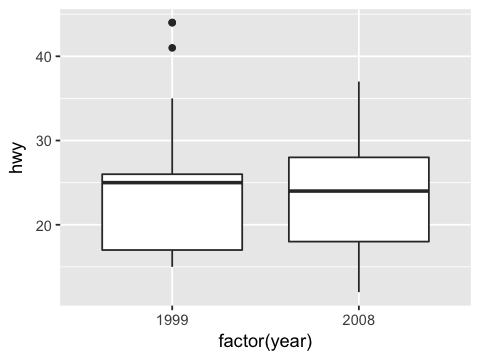

In [40]:
ggplot(data = mpg) +  # year vs. hwy. 
    geom_boxplot(mapping = aes(x=factor(year), y=hwy))  # convert year to factor

Surprisingly, the median highway gas mileage went down from 1999 to 2008. Why might this be? Let's try plotting the fraction of car types represented in each data set. To do this we will use use a new geom, `geom_bar`. This takes one aesthetic called `x=` and makes a plot with the number of times that each (discrete) value of `x` appears in the data set. Here is an example which counts the number of cars in each class:

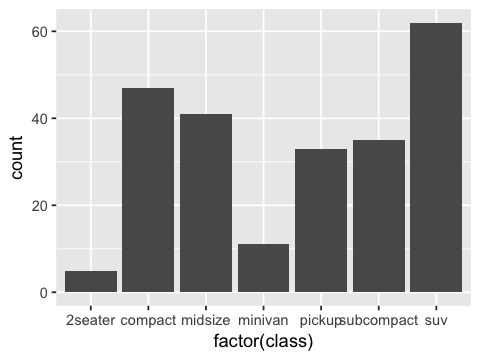

In [45]:
ggplot(mpg) + geom_bar(aes(x=factor(class)))

### Exercise
Use the `geom_bar` and the `fill=` aesthetic the make a plot of the number of different auto classes in 1999 vs. 2008:
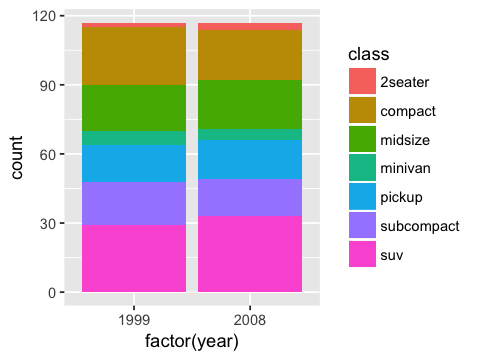

In [28]:
## Solution (your code here)

## Other geoms
There are many other geoms in ``ggplot()`` (over 30). We will not have time to go over them all. If you want to learn about other types of plots and geoms, check out this [graphical glossary](https://www.r-graph-gallery.com/portfolio/ggplot2-package/). The nice thing about plotting using ``ggplot`` is that can completely alter the type and appearance of your plot by simply switching to another type of geom.

Let's briefly circle back to the `flint` dataset that we saw in the first lecture.

In [30]:
load("../lecture00/flint.RData")
print(flint)

# A tibble: 23,184 x 10
   `Sample Number` `Date Submitted`    `Analysis (Lead… `Lead (ppb)`
   <chr>           <dttm>              <chr>                   <dbl>
 1 LF84899         2015-09-25 11:07:30 Lead                        0
 2 LF85330         2015-09-29 14:35:09 Lead                        0
 3 LF85604         2015-09-30 13:06:52 Lead                        0
 4 LF85613         2015-09-30 13:07:02 Lead                        0
 5 LF85796         2015-10-01 11:10:35 Lead                        0
 6 LF85797         2015-10-01 11:10:36 Lead                        0
 7 LF85799         2015-10-01 11:10:38 Lead                        0
 8 LF85802         2015-10-01 11:10:41 Lead                        0
 9 LF85862         2015-10-01 12:46:38 Lead                        0
10 LF85931         2015-10-02 09:54:53 Lead                        0
# … with 23,174 more rows, and 6 more variables: `Analysis (Copper)` <chr>,
#   `Copper (ppb)` <dbl>, `Street #` <chr>, `Street Name` <chr>, City <c

Let's generate box plots for the lead levels by zip code:

Warning message:
“Removed 13 rows containing non-finite values (stat_boxplot).”

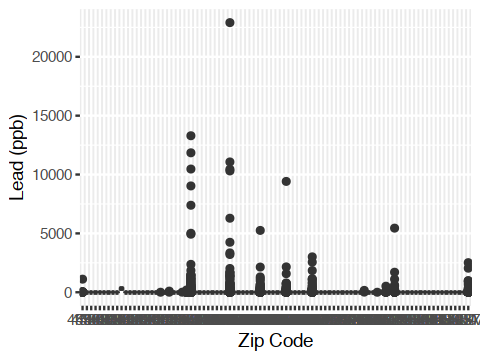

In [31]:
ggplot(flint) + geom_boxplot(aes(x=`Zip Code`, y=`Lead (ppb)`))

Selecting by n
Warning message:
“Removed 10087 rows containing non-finite values (stat_boxplot).”

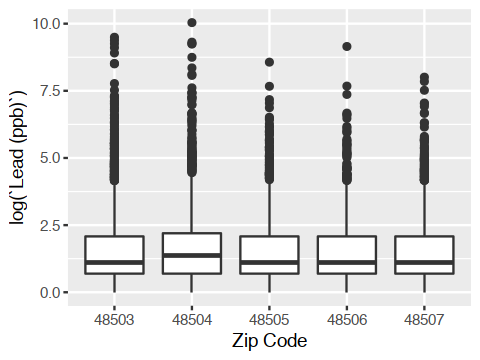

In [36]:
z <- top_n(count(flint, `Zip Code`), 5)$`Zip Code`
ggplot(filter(flint, `Zip Code` %in% z)) + geom_boxplot(aes(x=`Zip Code`, y=log(`Lead (ppb)`)))